In [72]:
%matplotlib inline
import numpy as np
import scipy as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statistics import mean


def B_ridge(y_sample, x_sample, l):
    x_transposed = np.transpose(x_sample)
    mul = np.matmul(x_transposed, x_sample)
    diag = np.identity(len(mul)) * l
    return np.matmul(np.matmul(np.linalg.inv(mul + diag), x_transposed), y_sample)


def draw_plot(title, sample_1, title_1, sample_2, title_2):
    plt.title(title)
    plt.xlabel(title_1)
    plt.ylabel(title_2)
    
    plt.plot(sample_1,sample_2)
    plt.show()

In [73]:
print("___PART I___\n")
Y_sample = [4.966667, 30.65334, 9.473333, 28.42333, 26.33167, 45.82833, 25.66, 16.01, 15.41833, 17.73667, 6.935, 18.04167, 12.51667, 5.331666, 22.325, 45.55, 13.455, 18.55833, 29.22667, 31.4,
            48.02833, 19.50667, 10.86833, 13.975, 32.51167, 5.453333, 23.7, 25.25333, 42.75, 12.85334, 25.90667, 23.45333, 21.635, 11.60167, 8.896666, 47.50666, 20.80333, 42.30167, 14.23167, 25.055]
Y_mean = mean(Y_sample)
X2_sample = [20.4, 28.3, 23.4, 19.1, 41.6, 22.9, 31.7, 29.5, 29.9, 25.1, 28.2, 24.8, 23.5, 22.5, 16, 39.8, 29.8, 27.7, 36.8,
             34.7, 35.9, 33.3, 20.9, 30, 26.9, 29.8, 21.7, 31.4, 36.7, 14.3, 29.4, 34.5, 29.3, 18.2, 14.5, 27.3, 23.5, 29.6, 35.2, 22.1]
X3_sample = [23.6, 33.4, 26, 34.8, 31.3, 50.3, 31.4, 28.6, 23.7, 30.6, 25.9, 21.7, 35, 24.9, 38.5, 30.2, 39.5, 31.3, 28.8,
             35.8, 27.3, 31.6, 31.7, 30.5, 37.3, 21.4, 40.8, 24.8, 26.8, 36.4, 23, 25.2, 28.3, 25.9, 41.8, 47.6, 32.2, 37.5, 21.7, 25.7]
X4_sample = [25.44, 33.96, 27.4, 35.32, 32.07, 49.27, 32.36, 29.84, 25.33, 31.54, 27.11, 23.53, 35.4, 26.41, 38.55, 31.18, 39.65, 32.17, 29.92,
             36.12, 28.57, 32.44, 32.63, 31.45, 37.57, 23.36, 40.72, 26.32, 28.12, 36.86, 24.5, 26.68, 29.47, 27.31, 41.52, 46.84, 32.98, 37.75, 23.53, 27.13]

k = 4
n = len(Y_sample)

X_sample = [[X2_sample[i], X3_sample[i], X4_sample[i]] for i in range(n)]
X_sample = sm.add_constant(X_sample)

model = sm.OLS(Y_sample, X_sample)
res = model.fit()
coefs = res.params
print("Coefs :", coefs)

Y_estimated = [sum(coefs[j] * X_sample[i][j]
                   for j in range(k)) for i in range(n)]
print("\nY_estimated =", Y_estimated)

RSS = sum(res.resid[i]**2 for i in range(len(Y_sample)))
print("\nRSS =", RSS)

F = res.fvalue
F_crit = st.stats.f.ppf(0.95, k - 1, n - k)
print("F =", F)
print("F_crit =", F_crit)

print()
t_test = res.tvalues
for i in range(k):
    print("t-test of β" + str(i + 1) + " =", t_test[i])
t_test_crit = st.stats.t.ppf(0.95, n - k)
print("t_test_crit =", t_test_crit)

q = 2  # кол-во знаков "=" в условии
Y_restricted = [coefs[0] + coefs[1] * X2_sample[i]
                for i in range(len(X2_sample))]
print("Y_restricted =", Y_restricted)
RSS_restricted = sum((Y_sample[i] - Y_restricted[i])
                     ** 2 for i in range(len(Y_estimated)))
print("\nRSS_r = " + str(RSS_restricted))

F_restricted = ((RSS_restricted - RSS) / q) / (RSS / (n - k))
print("F_restricted =", F_restricted)
F_restricted_crit = st.stats.f.ppf(0.95, q, n - k)
print("F_restricted_crit =", F_restricted_crit)

print()
corr_matrix = np.corrcoef([Y_sample, X2_sample, X3_sample, X4_sample])
names = ["Y", "X2", "X3", "X4"]
tab = "\t"
print(tab + names[0] + tab + names[1] + tab + names[2] + tab + names[3])
for i in range(4):
    print(names[i],end=tab)
    for j in range(4):
        print("%.4f" % corr_matrix[i][j],end=tab)
    print()

___PART I___

Coefs : [-6.71424569  1.08010078  8.26936304 -8.0549378 ]

Y_estimated = [5.5591602676699949, 26.503644142823248, 12.858255814896722, 17.189109768069784, 38.727154642417645, 37.102237468258181, 26.525161219964389, 21.293166254988193, 17.53309717929875, 19.386054613377127, 19.551735238088014, 9.9847451516050398, 22.951030801557351, 10.764254193507128, 18.419991470045431, 34.855568534975077, 32.734313745192026, 22.90825996216762, 30.187379562565866, 35.864094795622975, 27.685410335489991, 29.262800057778861, 15.166048455203907, 24.5765565543837, 28.163693420127743, 14.273779587884491, 26.116885892204493, 20.275159271189722, 28.039531455717196, 12.831002646503123, 17.890091037864721, 24.031439307799985, 21.576664174190455, 7.1397398357963198, 20.165573040704317, 39.100899580218879, 19.289763781452109, 31.283949340227252, 21.217793306962704, 11.148149091212247]

TSS = 5856.1051345 RSS = 2956.10349845 ESS = 2900.00163606
F = 11.772260224
F_crit = 2.86626555094

t-test of β1 = 

___PART II___

𝜆 = 0.0;	[-6.71424569  1.08010078  8.26936304 -8.0549378 ]
𝜆 = 0.1;	[-4.25491931  1.06950631  8.66787225 -8.50987771]
𝜆 = 0.2;	[-4.05945217  1.06068894  8.58047722 -8.42313641]
𝜆 = 0.3;	[-3.95565699  1.05216915  8.47677748 -8.31794014]
𝜆 = 0.4;	[-3.87787406  1.04389305  8.37083097 -8.2099634 ]
𝜆 = 0.5;	[-3.8116513   1.03584191  8.2656291  -8.10255014]
𝜆 = 0.6;	[-3.75194154  1.0280038   8.16213641 -7.99678542]
𝜆 = 0.7;	[-3.69650403  1.02036917  8.06071706 -7.89308487]
𝜆 = 0.8;	[-3.64417886  1.01292957  7.9615076  -7.79161002]
𝜆 = 0.9;	[-3.59429591  1.00567729  7.86454441 -7.69241027]
𝜆 = 1.0;	[-3.54643406  0.99860514  7.76981538 -7.59548063]
𝜆 = 1.1;	[-3.50031009  0.99170636  7.67728366 -7.50078805]
𝜆 = 1.2;	[-3.45572262  0.98497457  7.58689941 -7.4082847 ]
𝜆 = 1.3;	[-3.41252155  0.97840372  7.49860621 -7.31791498]
𝜆 = 1.4;	[-3.37059043  0.97198805  7.41234451 -7.22961952]
𝜆 = 1.5;	[-3.32983589  0.96572211  7.32805377 -7.14333747]
𝜆 = 1.6;	[-3.29018083  0.95960068  7.2456

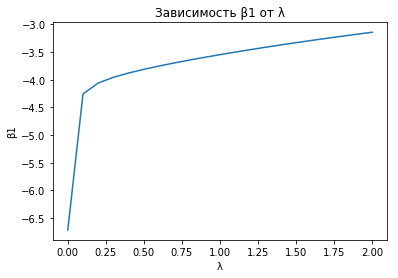

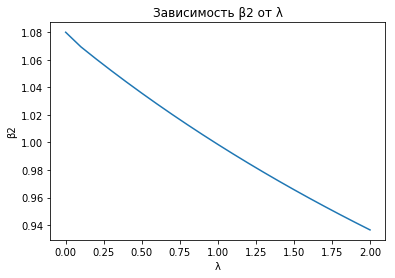

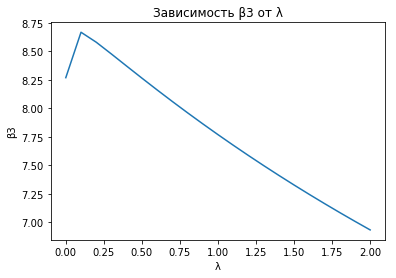

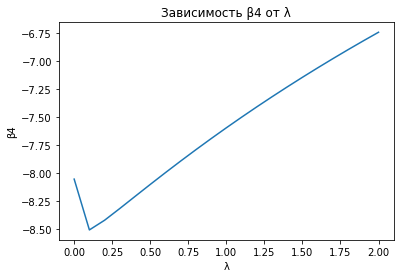

In [86]:
print("___PART II___\n")
lmd = []
b1 = []
b2 = []
b3 = []
b4 = []
for i in range(21):
    res = B_ridge(Y_sample, X_sample, i / 10)
    lmd.append(i/10)
    b1.append(res[0])
    b2.append(res[1])
    b3.append(res[2])
    b4.append(res[3])
    print("𝜆 = " + str(i / 10) + ";\t" + str(res))
    
print("\nGraphics:")
draw_plot("Зависимость β1 от λ",lmd,"λ",b1,"β1")
draw_plot("Зависимость β2 от λ",lmd,"λ",b2,"β2")
draw_plot("Зависимость β3 от λ",lmd,"λ",b3,"β3")
draw_plot("Зависимость β4 от λ",lmd,"λ",b4,"β4")